# Pronoun Counts

In [6]:
import pandas as pd
import sqlite3
import os
import numpy as np


from helpers.normalization import remove_punctuation, remove_punctuation_and_newlines
from helpers.stats import run_t_test_on_gender

db_path = "../../giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
prompts = pd.read_sql("SELECT ep.*, u.age, u.work_exp_years FROM expanded_prompts ep JOIN users u ON ep.user_id = u.user_id", conn)
prompts = prompts.dropna(subset=['conversational'])
prompts = prompts[prompts['conversational'].str.strip() != '']
prompts = prompts.dropna(subset=['conversational'])
user_prompts = (
    prompts
    .fillna({'work_exp_years': 'None'})
    .groupby(['user_id', 'gender', 'age', 'work_exp_years'])['conversational']
    .apply(' '.join)
    .reset_index()    # Reset index to create a DataFrame
)
user_prompts

,user_id,gender,age,work_exp_years,conversational
0,6,Man (cisgender),19-25,3.0,"parsing data from python iterator, how it coul..."
1,8,Man (cisgender),19-25,1.0,\n I am working on the problem of reconstru...
2,11,Woman (cisgender),26-30,1.0,Can you adapt the following code so that inste...
3,15,Man (cisgender),26-30,6.0,SET_ALL_TABLES action is currently not fetchin...
4,16,Woman (cisgender),19-25,None,I want to use Dummy Hot encoding to replace th...
5,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...
6,28,Woman (cisgender),31-35,5.0,I have a pandas dataframe like this:\n\nI want...
7,29,Woman (cisgender),26-30,None,Now I want to bring judgement balancing into t...
8,30,Non-binary,26-30,None,"as a NLP and LLM researcher, I am recently dow..."
9,31,Man (cisgender),36-40,22.0,How can I make use of an ObservableHQDatabaseC...


# Define Pronouns

In [3]:
# Personal pronouns
personal = [
    "I", "me", "my", "mine", "myself",
    "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself",
    "she", "her", "hers", "herself",
    "it", "its", "itself",
    "we", "us", "our", "ours", "ourselves",
    "they", "them", "their", "theirs", "themselves"
]

# Demonstrative pronouns
demonstrative = [
    "this", "that", "these", "those"
]

# Interrogative pronouns
interrogative_relative = [
    "who", "whom", "whose", "which", "what"
]


## Count

In [18]:
from helpers.occurences import count_occurrences


def count_pronouns(text, pronouns):
    total = 0
    for pronoun in pronouns:
        total += count_occurrences(text, pronoun, True)
    return total/len(text.split())

pronoun_types = ['personal', 'demonstrative', 'interrogative_relative']
pronoun_lists = [personal, demonstrative, interrogative_relative]

for pronoun_type, pronoun_list in zip(pronoun_types, pronoun_lists):
    user_prompts[pronoun_type] = user_prompts['conversational'].apply(lambda x: count_pronouns(x, pronoun_list))
    for pronoun in pronoun_list:
        user_prompts[pronoun] = user_prompts['conversational'].apply(lambda x: (count_occurrences(x, pronoun, True))/len(x.split()))

user_prompts


,user_id,gender,age,work_exp_years,conversational,personal,I,me,my,you,...,she,her,hers,herself,ours,theirs,themselves,who,whom,whose
0,6,Man (cisgender),19-25,3.0,"parsing data from python iterator, how it coul...",0.045918,0.015306,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,Man (cisgender),19-25,1.0,\n I am working on the problem of reconstru...,0.055556,0.027778,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,Woman (cisgender),26-30,1.0,Can you adapt the following code so that inste...,0.118557,0.030928,0.005155,0.015464,0.041237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,Man (cisgender),26-30,6.0,SET_ALL_TABLES action is currently not fetchin...,0.083333,0.055556,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16,Woman (cisgender),19-25,None,I want to use Dummy Hot encoding to replace th...,0.084559,0.051471,0.001838,0.005515,0.007353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...,0.046296,0.027778,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,28,Woman (cisgender),31-35,5.0,I have a pandas dataframe like this:\n\nI want...,0.097865,0.039146,0.010676,0.005338,0.014235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,29,Woman (cisgender),26-30,None,Now I want to bring judgement balancing into t...,0.032258,0.032258,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,31,Man (cisgender),36-40,22.0,How can I make use of an ObservableHQDatabaseC...,0.043478,0.032609,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,34,Man (cisgender),51-60,20.0,Blender and Python. I have a collection of hun...,0.055768,0.019862,0.000000,0.001528,0.006875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filter out zero colums

In [23]:
zero_cols = user_prompts.columns[(user_prompts.fillna(0.0) == 0.0).all()].tolist()

columns = personal + demonstrative + interrogative_relative

filtered_cols = list(set(columns) - set(zero_cols))
print(filtered_cols)



['you', 'he', 'my', 'it', 'its', 'yourself', 'these', 'I', 'them', 'itself', 'this', 'their', 'ourselves', 'which', 'us', 'me', 'those', 'what', 'we', 'our', 'they', 'that', 'your', 'personal', 'demonstrative', 'interrogative_relative']


## Plot single counts

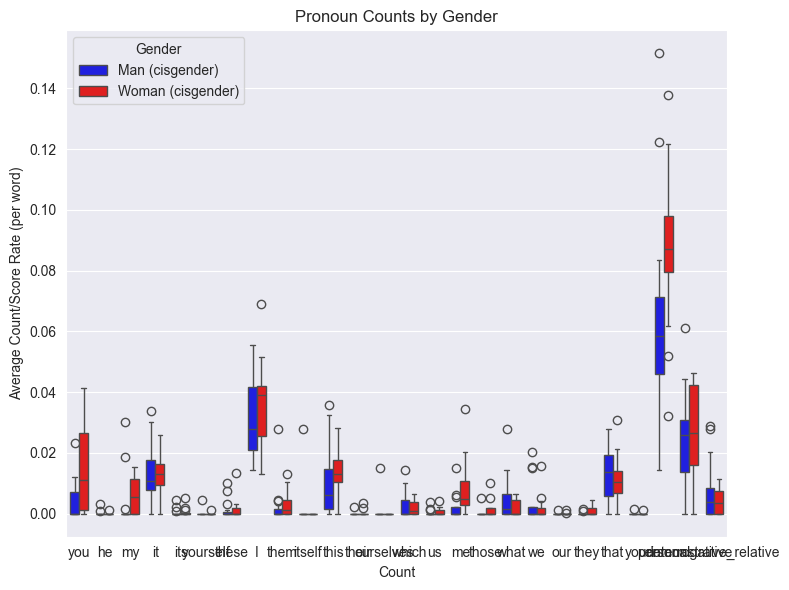

you:
  T-statistic: -2.4111, p-value: 0.0285
  Female: n=13, variance=0.0002
  Male:   n=15, variance=0.0000
he:
  T-statistic: 0.6825, p-value: 0.5029
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
my:
  T-statistic: -1.1277, p-value: 0.2704
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0001
it:
  T-statistic: 0.2241, p-value: 0.8245
  Female: n=13, variance=0.0001
  Male:   n=15, variance=0.0001
its:
  T-statistic: -0.3166, p-value: 0.7543
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
yourself:
  T-statistic: 0.6242, p-value: 0.5407
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
these:
  T-statistic: -0.3006, p-value: 0.7663
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
I:
  T-statistic: -0.8065, p-value: 0.4276
  Female: n=13, variance=0.0002
  Male:   n=15, variance=0.0002
them:
  T-statistic: -0.1949, p-value: 0.8471
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0001
itself:
  T-statist

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

user_prompts= user_prompts[user_prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

melted = user_prompts.melt(
    id_vars=['user_id', 'gender'],
    value_vars=filtered_cols,
    var_name='Pronoun',
    value_name='Normalized Rate'
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=melted,
    x='Pronoun',
    y='Normalized Rate',
    hue='gender',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'},
    width=0.7
)

plt.title('Pronoun Counts by Gender')
plt.ylabel('Average Count/Score Rate (per word)')
plt.xlabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

for col in filtered_cols:
    run_t_test_on_gender(user_prompts, col)

## Plot groups

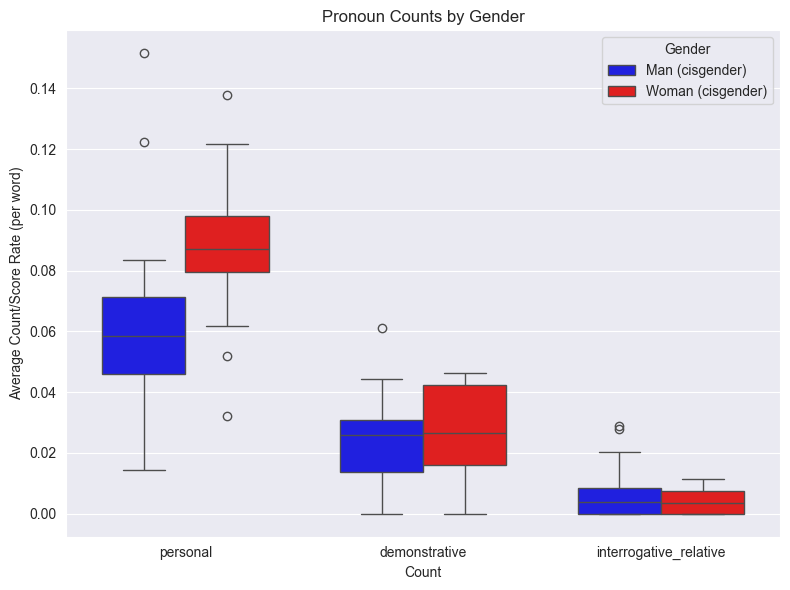

personal:
  T-statistic: -1.8449, p-value: 0.0765
  Female: n=13, variance=0.0008
  Male:   n=15, variance=0.0012
demonstrative:
  T-statistic: -0.3914, p-value: 0.6987
  Female: n=13, variance=0.0002
  Male:   n=15, variance=0.0003
interrogative_relative:
  T-statistic: 1.2445, p-value: 0.2280
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0001


In [25]:
user_prompts= user_prompts[user_prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

melted = user_prompts.melt(
    id_vars=['user_id', 'gender'],
    value_vars=pronoun_types,
    var_name='Pronoun',
    value_name='Normalized Rate'
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=melted,
    x='Pronoun',
    y='Normalized Rate',
    hue='gender',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'},
    width=0.7
)

plt.title('Pronoun Counts by Gender')
plt.ylabel('Average Count/Score Rate (per word)')
plt.xlabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

for col in pronoun_types:
    run_t_test_on_gender(user_prompts, col)